## Assignment 5

This assignment is based on Bayesian statistics to carry out Stock return analysis.

## Learning outcomes

- Bayesian analysis for stock return data
- Build models for different distributions of data
- Compare models

In this assignment, you will use the Baysesian approach for analysis of stock return data.
In particular, you will model the data as a normal distribution and will estimate distribution parameters using Markov chain Monte Carlo technique (MCMC).

The MCMC sampler draws parameter values from the prior distribution and computes the likelihood that the observed data came from a distribution with these parameter values.
It is recommended to use PyMC library for these computations; PyMC is a Python library for Bayesian analysis.

__NOTE__: The 'data.csv' file included with the assignment contains the data.
The data were downloaded from Quandl, the code used to download data and calculate daily return is provided.    
Use that file instead if you aren't able to read the data, or if you have reached the limit for calls to the API.

__Getting data from Quandl__ 
To download stock data from Quandl you should create an account for quandl (https://www.quandl.com/).

Quandl is a platform for financial, economic, and alternative data that serves investment professionals. Quandl sources data from over 500 publishers. All Quandl's data are accessible via an API. API access is possible through packages for multiple programming languages including R, Python.

Required imports for this project are given below.  Make sure you have all libraries required for this project installed.  You may use _conda_ or _pip_ based on your set up.


In [1]:
#required imports

import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import theano.tensor as tt
import seaborn as sns
from datetime import datetime
import arviz as az

## Get the data:
pd.core.common.is_list_like = pd.api.types.is_list_like # resolves datareader error
from pandas_datareader import data
# For all libraries please install the necessary libraries 
#If the above fails, you might need to do something like this:
#This is to show how you install pandas-datareader, you might need to do this for all libraries
#conda install pandas-datareader
#or
#pip install pandas-datareader
#Depending on your setup

from IPython.display import Image
from datetime import datetime
%matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Steven\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


After installing the necessary libraries, we will proceed to download the data.
You might have to set an environment variable for pymc3 package.  
You can do this by    
For linux:
export mkl_threading_layer=gnu or set this in your bashrc file.

For windows:
Add it in your environment variables

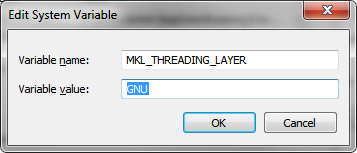

### Returns
Extract historical data for Apple (AAPL) [2015 - 2016], calculate daily returns, and estimate the mean daily return. Remove NaN from dataset. Plot histogram of daily returns.

Use code below to download data.

For this you will need to install the library quandl:    
conda install -c anaconda quandl

You will also need an API Key that is generated when you create an account.  

In [2]:
#import quandl
#quandl.ApiConfig.api_key = '4XWVLg3qR7xBfGT4PF3i'

#data= quandl.get('WIKI/AAPL', start_date='2015-1-1', end_date='2016-12-31')
print(type(data))

#data.to_csv('data.csv')

#returns=data['Adj. Close'].pct_change()

#returns = returns.dropna()*100

<class 'module'>


#### Question 1

1. Plot the returns and draw a histogram to see the distribution


In [3]:
# import dataset
data = pd.read_csv("data.csv")

In [4]:
# calculate daily return
returns = (data["Close"] - data["Open"]) / data["Open"] * 100

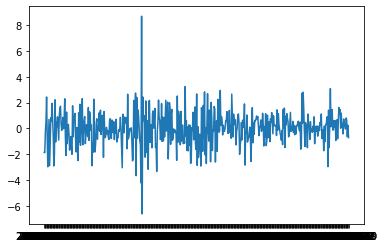

In [5]:
# plot daily return
plt.plot(data["Date"], returns)
plt.show()

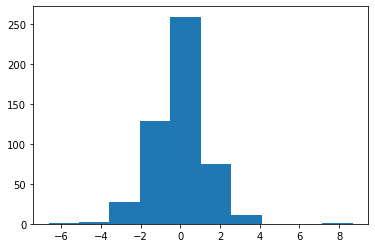

In [6]:
# histogram of daily return
plt.hist(returns)
plt.show()

In the cell below, the model for daily return simulations is shown. Since the daily returns histogram shows bell-shaped distribution, the normal distribution is used for likelihood computation.

This model uses un-informative priors - Uniform distribution for both parameters of the notmal distribution ("mu" and 'sigma").

In [7]:
with pm.Model() as model_n:
    #Prior
    mu = pm.Uniform("mu", lower=-10, upper=10, testval=0)
    sigma = pm.Uniform("sigma", lower=0, upper=6, testval=0.0001)
    
    #Likelihood
    likelihood = pm.Normal("likelihood", mu=mu, sd=sigma, observed = returns.values)
    
    #Posterior
    start = pm.find_MAP()
    step  = pm.Metropolis()
    trace = pm.sample(10000, chains=3, step=step, start=start, progressbar=True)
    burned_trace = trace[3000::2]

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mu]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 91 seconds.
The number of effective samples is smaller than 25% for some parameters.


C:\Users\Steven\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB82917548>,
      dtype=object)

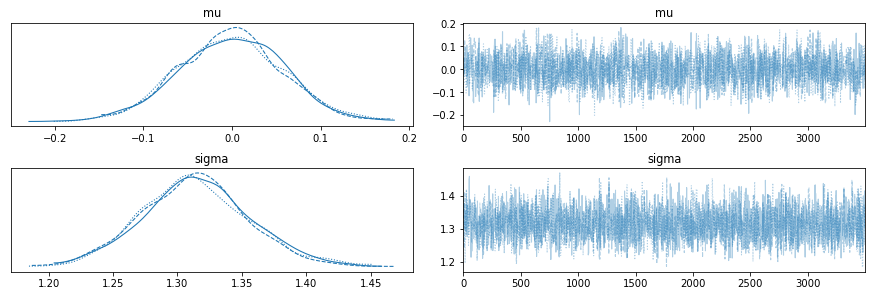

In [8]:
pm.traceplot(burned_trace)

C:\Users\Steven\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB825FD5C8>,
      dtype=object)

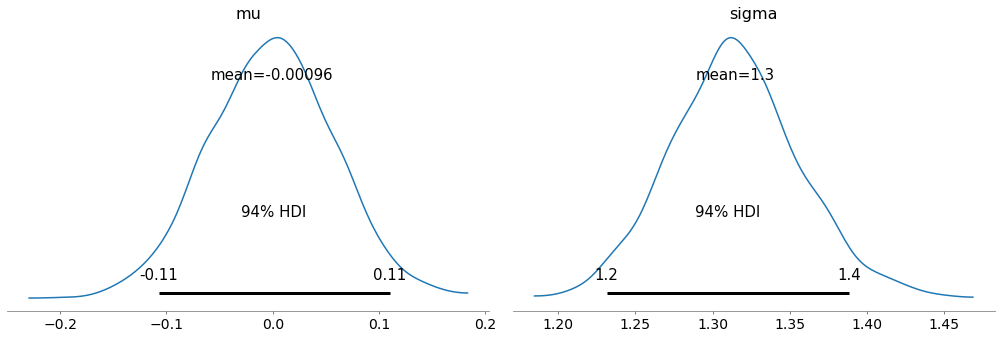

In [9]:
pm.plot_posterior(burned_trace)

#### Question 2

Improve the model for daily returns given above.
Choose different prior distributions for parameters of the likelihood distribution - Mean $\mu$ and Standard Deviation $\sigma$.

To tune the model, try several different distributions with various spread/dispersion values (for example, Uniform, Normal, HalfNormal) for priors, and different numbers of samples.
By inspecting posterior distribution of parameters, pick the value that produces the smoothest, most convergent chains. 

Present posterior distribution graphically. 

In [10]:
# YOUR CODE HERE
with pm.Model() as model_n:
    #Prior
    mu = pm.Normal("mu", mu=0.5, sigma=2)
    sigma = pm.Normal("sigma", mu=2, sigma=1)
    
    #Likelihood
    likelihood = pm.Normal("likelihood", mu=mu, sd=sigma, observed = returns.values)
    
    #Posterior
    start = pm.find_MAP()
    step  = pm.Metropolis()
    trace = pm.sample(30000, chains=3, step=step, start=start, progressbar=True)
    burned_trace = trace[3000::2]

Multiprocess sampling (3 chains in 3 jobs)


CompoundStep
>Metropolis: [sigma]
>Metropolis: [mu]


Sampling 3 chains for 1_000 tune and 30_000 draw iterations (3_000 + 90_000 draws total) took 150 seconds.
The number of effective samples is smaller than 25% for some parameters.


C:\Users\Steven\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB826C0748>,
      dtype=object)

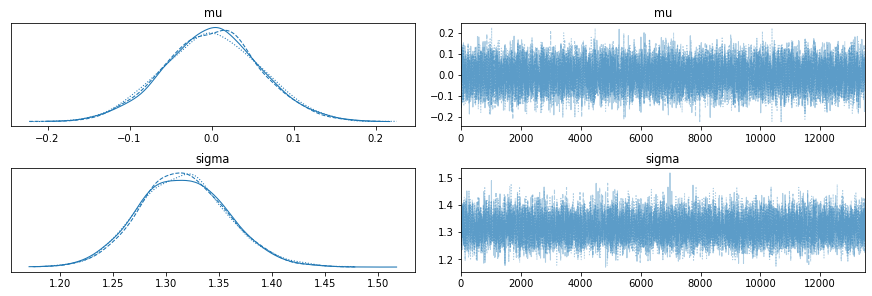

In [11]:
# SHOW TRACE PLOT
pm.traceplot(burned_trace)

C:\Users\Steven\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB8261E988>,
      dtype=object)

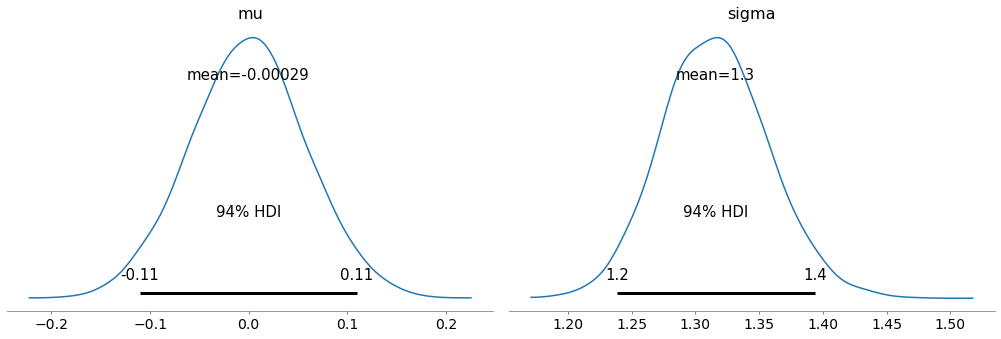

In [12]:
# PLOT POSTERIOR DISTRIBUTION
pm.plot_posterior(burned_trace)

#### Question 3

As a validation check of model performance, predict the distribution of daily returns from the obtained posterior distributions. To generate the data, use the pymc3 function for sampling posterior distribution with an appropriately chosen number of samples from the trace.

Present results of predicted distribution graphically as a histogram.

In [13]:
# Sample posterior to obtain the distribution of daily returns
mu_samples = burned_trace["mu"][:, None]
sigma_samples = burned_trace["sigma"][:, None]

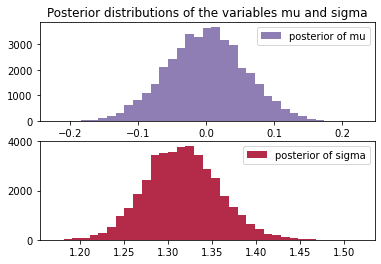

In [14]:
# Plot obtained distribution of daily return

plt.subplot(211)
plt.title(r"Posterior distributions of the variables mu and sigma")
plt.hist(mu_samples, histtype='stepfilled', bins=35, alpha=0.85, label=r"posterior of mu", color="#7A68A6")
plt.legend()

plt.subplot(212)
plt.hist(sigma_samples, histtype='stepfilled', bins=35, alpha=0.85, label=r"posterior of sigma", color="#A60628")
plt.legend()

#### Question 4

(a) Identify the parameter of interest in the prediction model. What would be the best prior distribution to produce these parameters? 

(b) What is the HDI in the posteriors for the parameters you named in 4a? What number of samples was used to build this model? 

(c) Does the data generated when predicting daily returns from posterior distribution deviate significantly from the true distribution?

In [15]:
# YOUR ANSWERS TO 4(a-c).
# Q4(a)
# mu and sigma are the parameter of interest in the prediction model
# Normal distribution is the best prior distribution to produce these parameters

In [16]:
# Q4(b)
# The HDI for the mu in the posteriors is [-0.11, 0.11]
mu_hdi = mu_samples
az.hpd(mu_samples)

C:\Users\Steven\Anaconda3\lib\site-packages\arviz\stats\stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)
C:\Users\Steven\Anaconda3\lib\site-packages\arviz\stats\stats.py:486: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


array([[-0.11011025,  0.10964584]])

In [17]:
# Q4(b)
# The HDI for the sigma in the posteriors is [1.24, 1.39]
sigma_hdi = sigma_samples
az.hpd(sigma_samples)

array([[1.23871061, 1.39357455]])

In [18]:
# Q4(b)
# 30,000 data were used as samples to build this model

In [19]:
# Q4(c)
# No, the data generated when predicting daily returns from posterior distribution does not deviate significantly from the true distribution